## 1. Imports

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk


from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

print("All systems go! 🚀")

All systems go! 🚀


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [92]:
df = pd.read_csv(
    "judge-1377884607_tweet_product_company.csv",
    encoding="latin1")

df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## 2. Data Inspection

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


## 3. Data Cleaning

In [94]:
# Drop the one row where text is missing
df.dropna(subset=['tweet_text'], inplace=True)

# Fill missing brand/product targets with 'Unknown'
df['emotion_in_tweet_is_directed_at'] = df['emotion_in_tweet_is_directed_at'].fillna('Unknown')

print("Missing values handled!")

Missing values handled!


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     9092 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


##  4. Feature Engineering

Text Length: Does the length of a tweet correlate with emotion? (Angry people sometimes rant more!)

Brand Extraction: Since we have the target brand column, we can simplify it into "Apple", "Google", or "Unknown" to reduce noise.

Clean Text: We create a new feature by stripping the "garbage" (mentions, hashtags, punctuation) from the raw text.

## 5. Encoding
- Label Encoding - the Target
- Text Vectorization - The Features 
    - TF-IDF (Term Frequency-Inverse Document Frequency). This turns our clean_text into a massive matrix of numbers that represent how important a word is to a specific tweet compared to the whole dataset. 

### a. Encode the target sentiment labels

In [96]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['is_there_an_emotion_directed_at_a_brand_or_product'])

mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Sentiment Mapping: {mapping} 🗺️")

Sentiment Mapping: {"I can't tell": 0, 'Negative emotion': 1, 'No emotion toward brand or product': 2, 'Positive emotion': 3} 🗺️


In [97]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,sentiment_encoded
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,1
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,3
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,3
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,1
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,3


### b. `emotion_in_tweet_is_directed_at` column

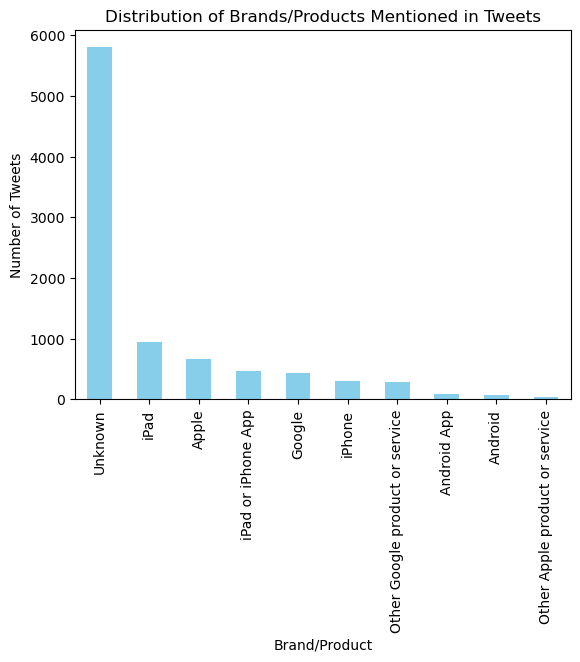

In [98]:
df['emotion_in_tweet_is_directed_at'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Brands/Products Mentioned in Tweets')
plt.xlabel('Brand/Product')
plt.ylabel('Number of Tweets')
plt.show()

In [99]:
# Basic Feature Engineering: Tweet Length
df['tweet_length'] = df['tweet_text'].apply(len)

# Simplifying the 'Directed At' column (Feature Engineering)
def simplify_brand(brand):
    brand = str(brand).lower()
    # Categorizing Apple products (iPad, iPhone, Apple App, etc.)
    if any(keyword in brand for keyword in ['apple', 'iphone', 'ipad']):
        return 'Apple'
    # Categorizing Google products (Google, Android, etc.)
    elif any(keyword in brand for keyword in ['google', 'android']):
        return 'Google'
    # Everything else (like your huge 'Unknown' bar)
    else:
        return 'Unknown'

df['brand_group'] = df['emotion_in_tweet_is_directed_at'].apply(simplify_brand)

print("Engineering complete! 🛠️")
df.head()

Engineering complete! 🛠️


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,sentiment_encoded,tweet_length,brand_group
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,1,127,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,3,139,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,3,79,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,1,82,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,3,131,Google


#### Renaming columns

In [100]:
df.rename(columns={
    'tweet_text': 'text',
    'emotion_in_tweet_is_directed_at': 'target_device',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment_label'
}, inplace=True)

print("Columns renamed! 🏷️")
df.head(2)

Columns renamed! 🏷️


,text,target_device,sentiment_label,sentiment_encoded,tweet_length,brand_group
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,1,127,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,3,139,Apple


### Deep Cleaning the `text` column

In [101]:
# Initialize our cleaning tools 
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_tweet(text):
    # Handle that one missing value just in case! 
    if not isinstance(text, str):
        return ""
    
    # 1. Remove URLs, @mentions, and hashtags (like #SXSW) 
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    
    # 2. Keep only letters (remove numbers and punctuation) 
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # 3. Lowercase and tokenize
    words = text.lower().split()
    
    # 4. Remove Stopwords and Lemmatize 
    clean_words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    
    return " ".join(clean_words)

# Apply the magic! 
df['clean_text'] = df['text'].apply(clean_tweet)

print("Text cleaning complete!")
df[['text', 'clean_text']].head()

Text cleaning complete!


,text,clean_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,g iphone hr tweeting riseaustin dead need upgr...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,hope year festival isnt crashy year iphone app...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri sxsw marissa mayer google tim ...


In [102]:
df.head()

,text,target_device,sentiment_label,sentiment_encoded,tweet_length,brand_group,clean_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,1,127,Apple,g iphone hr tweeting riseaustin dead need upgr...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,3,139,Apple,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,3,79,Apple,wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,1,82,Apple,hope year festival isnt crashy year iphone app...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,3,131,Google,great stuff fri sxsw marissa mayer google tim ...


## Exploratory Data Analysis (EDA)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2836\871131452.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='viridis')


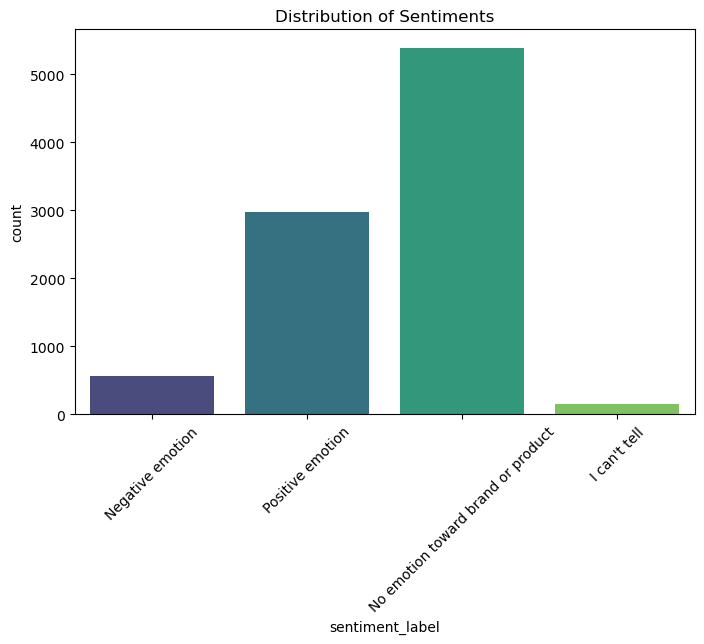

In [103]:
# Visualize Sentiment Distribution 
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_label', data=df, palette='viridis')
plt.title('Distribution of Sentiments')
plt.xticks(rotation=45)
plt.show()

c:\Users\ADMIN\miniconda3\envs\learn-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127963 (\N{CLASSICAL BUILDING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


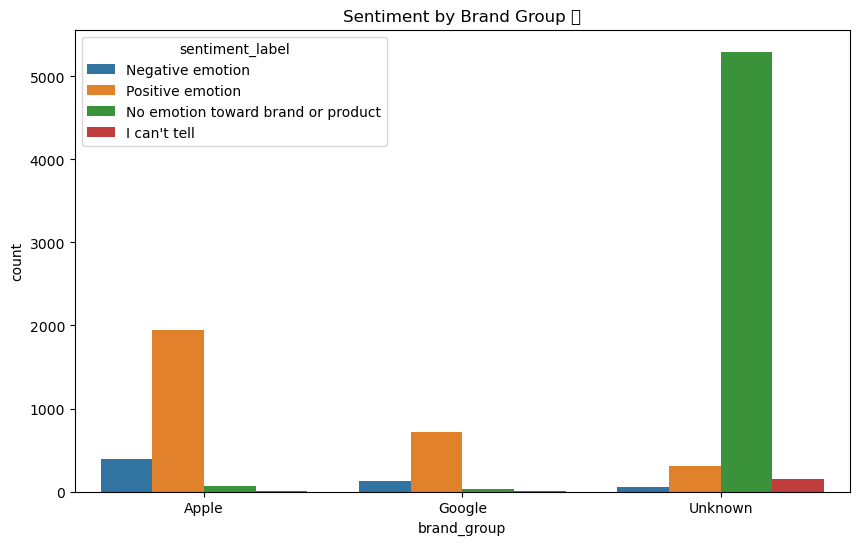

In [104]:
# Check Brand Influence 
plt.figure(figsize=(10, 6))
sns.countplot(x='brand_group', hue='sentiment_label', data=df)
plt.title('Sentiment by Brand Group 🏛️')
plt.show()

c:\Users\ADMIN\miniconda3\envs\learn-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


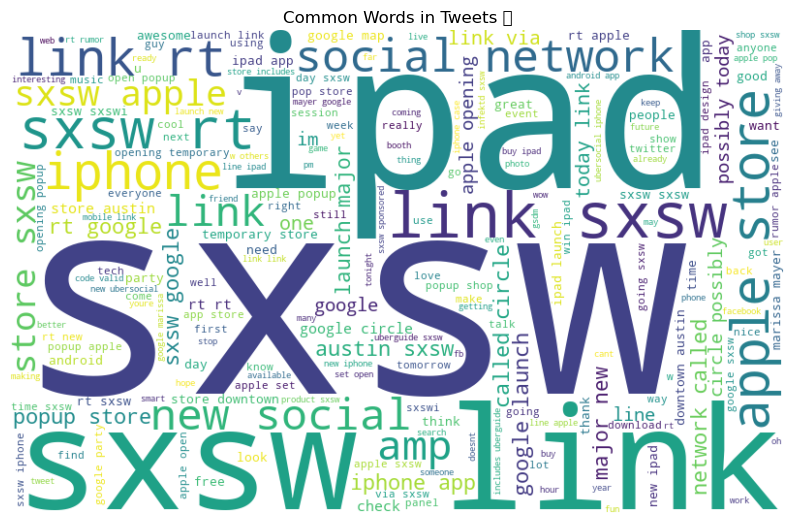

In [105]:
#  Word Cloud 
from wordcloud import WordCloud

all_words = ' '.join([text for text in df['clean_text']])
wordcloud = WordCloud(width=800, height=500, background_color='white').generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Tweets 🗣️')
plt.show()

`🎭 Distribution of Sentiments`
Looking at your second chart, we have a classic class imbalance problem:

`The "Quiet" Majority`: Most tweets (over 5,000) are "No emotion toward brand or product." These are likely just news updates or general chatter.

`Positive vs. Negative:` There are significantly more Positive emotions (~3,000) than Negative emotions (under 1,000).

`The Challenge`: Because negative tweets are the rarest, the model might struggle to learn what "anger" looks like compared to "praise." We'll need to keep a close eye on Recall (making sure we don't miss those few negative ones!). 🔍

`📱 Distribution of Brands/Products`
Your first chart confirms why our brand_group engineering was so important:

`The "Unknown" Giant`: Over 5,800 tweets don't specify a product. This matches your initial observation that 64% of the target column was missing.

`Apple Dominance:` iPad and iPhone-related mentions far outnumber Google-related mentions in this specific dataset.

`Model Strategy`: Since "Unknown" is the largest category, our model needs to rely heavily on the text itself rather than just the brand name to determine sentiment. 📝

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer ⚙️
# max_features=2000 keeps the top most important words to avoid "overloading" the model
tfidf = TfidfVectorizer(max_features=2000, ngram_range=(1, 2)) 

# Create the feature matrix
X_tfidf = tfidf.fit_transform(df['clean_text']).toarray()

print(f"TF-IDF Matrix Shape: {X_tfidf.shape} 🕸️")
# This means you now have 2000 numerical columns representing your text!

TF-IDF Matrix Shape: (9092, 2000) 🕸️


## One Hot Encode the brand group

In [108]:
# Convert brand_group into numerical dummy variables
brand_dummies = pd.get_dummies(df['brand_group'], prefix='brand')

# Combine TF-IDF features with our brand dummies and tweet length
# We use hstack (horizontal stack) because TF-IDF is a "sparse" matrix

from scipy.sparse import hstack, csr_matrix

# 1. Ensure tweet_length is a 2D array (N rows, 1 column)
# .values.reshape(-1, 1) turns it from [127, 139...] into [[127], [139]...]
tweet_len_2d = df['tweet_length'].values.reshape(-1, 1)

# 2. Convert brand_dummies to a sparse matrix to keep things efficient ⚡
brand_sparse = csr_matrix(brand_dummies.values)

# 3. Stack them horizontally
# We convert the dense numerical parts into csr_matrix so hstack is happy!
X_final = hstack([
    X_tfidf, 
    brand_sparse, 
    csr_matrix(tweet_len_2d)
])

print(f"Final feature matrix shape: {X_final.shape} 🧬")


Final feature matrix shape: (9092, 2004) 🧬


Features (X) and Target (y)

Role,Column(s),Description
Feature (X),X_tfidf,

Feature (X),tweet_length
Feature (X),brand_group,(Encoded)
Target (y),sentiment_encoded,"This is what the model tries to predict (0, 1, or 2)."

## Train/Test Split

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Split the data 
X_train, X_test, y_train, y_test = train_test_split(
    X_final, df['sentiment_encoded'], test_size=0.2, random_state=42
)

# 2. Initialize the model with bclass weight handling
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# 3. Train! 
rf_model.fit(X_train, y_train)

# 4. Predict! 
y_pred = rf_model.predict(X_test)

print("Model Training Complete! 🎉")

Model Training Complete! 🎉


Classification Report: 📋


c:\Users\ADMIN\miniconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ADMIN\miniconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ADMIN\miniconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.77      0.14      0.24       121
           2       0.92      0.98      0.95      1065
           3       0.82      0.91      0.86       606

    accuracy                           0.89      1819
   macro avg       0.63      0.51      0.51      1819
weighted avg       0.87      0.89      0.86      1819



c:\Users\ADMIN\miniconda3\envs\learn-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


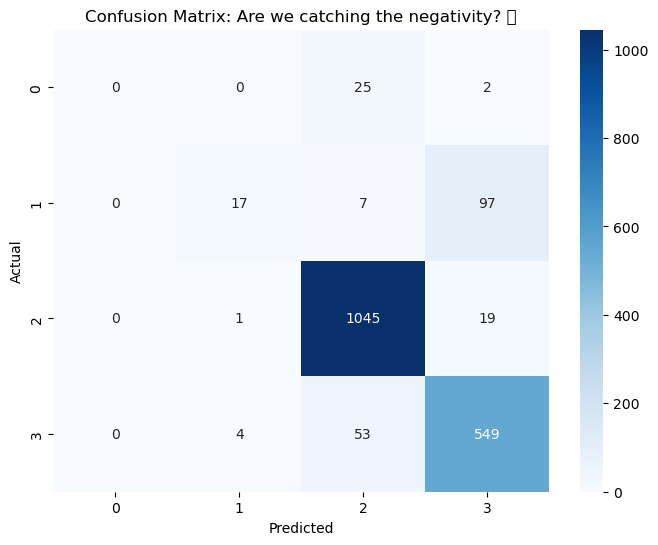

In [ ]:
# See how well we did
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualizing the Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Are we catching the negativity? 🔍')
plt.show()